# <span style ="color: #6B8E23">Case Study 2: Bellabeat Analysis</span>

Author: Matt Johnson

Date: 2023-07-14

Email: matt.johnson0304@gmail.com

GitHub: https://github.com/MjxSjx

LinkedIn: https://www.linkedin.com/in/matt-johnson0304/

## <span style="color:#6B8E23"> Introduction: </span>

Welcome to my Bellabeat analysis case study. Here, we will tackle the real-world challenges faced by Bellabeat, a smart device company based in San Francisco. Throughout this study, we will follow the data analysis process to answer key business questions and develop actionable insights.

The company's mission:
Become a larger player in the global smart device market.

Products:

* App: track activity, sleep, stress, menstrual cycle, and mindfulness habits.
* Wearable Device: connects to the app to track activity, sleep, and stress.
* Watch: connects to the app to track activity, sleep, and stress.
* Water Bottle: connects to the app to track daily water intake.
* Subscription membership: personalized guidance on nutrition, activity, sleep, health, beauty, and mindfulness based on their lifestyle and goals.

### <span style="color:#6B8E23"> Deliverables: </span>

My task in the assignment is:

* Find out user usage for one device to gain insights on how people are using that device. Then take that information and make a high-level recommendation on how the trends can inform Bellabeat's marketing strategy.


### <span style="color:#6B8E23"> Problem: </span>

I have been asked to focus on one of Bellabeat’s products and analyze smart device data to gain insight into how consumers are using their smart devices.
The insights I discover will then help guide the marketing strategy for the company.
You will present your analysis to the Bellabeat executive team (Sando Mur) along with your high-level recommendations for Bellabeat’s marketing strategy.

## <span style="color:#6B8E23"> Ask - Step 1: Ask the right questions </span>

Analyze other companies smart device usage data to gain insight into how consumers use non-Bellabeat smart devices. Select one Bellabeat product to apply these insights to in your presentation.

These questions will guide your analysis:

1. What are some trends in smart device usage?
2. How could these trends apply to Bellabeat customers?
3. How could these trends help influence Bellabeat's marketing strategy?



I will produce a report with the following deliverables:

1. A clear summary of the business task
2. A description of all data sources used: 
3. Documentation of any cleaning or manipulation of data
4. A summary of your analysis
5. Supporting visualizations and key findings
6. Your top high-level content recommendations based on your analysis

## <span style="color:#6B8E23"> Prepare - Step 2: Upload, inspect and clean the data </span>

### <span style="color:#6B8E23"> Uploading </span>

This Kaggle data set contains personal fitness trackers from thirty-three Fitbit users.
Thirty-three eligible Fitbit users consented to the submission of personal tracker data, including minute-level output for physical activity, heart rate, and sleep monitoring.
It includes information about daily activity, steps, and heart rate that can be used to explore users’ habits [Source](https://www.kaggle.com/arashnic)


* Since our goal is to essentially give broad strokes data about the Bellabeats users. We want to mainly focus on daily data and specifically the dailyActivity_merged file as our nexus. dailyActivity_merged has all the "daily" sheet titled columns already merged into it. Also, I will be adding values: day_of_week.

In [47]:
library(janitor)
library(skimr);
library(tidyverse);

In [48]:
setwd("D:/Merit/Merit Projects/Case Study 2")
getwd() #check you set your directory correctly;

[1] "D:/Merit/Merit Projects/Case Study 2"

In [49]:
daily_activity <- read_csv("Fitabase Data 4.12.16-5.12.16/dailyActivity_merged.csv")
daily_sleep <- read_csv("Fitabase Data 4.12.16-5.12.16/sleepDay_merged.csv")
heartrate <- read_csv("Fitabase Data 4.12.16-5.12.16/heartrate_seconds_merged.csv")
weight_log <- read_csv("Fitabase Data 4.12.16-5.12.16/weightLogInfo_merged.csv")


Rows: 940 Columns: 15
── Column specification ────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): ActivityDate
dbl (14): Id, TotalSteps, TotalDistance, TrackerDistance, LoggedActivitiesDi...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 413 Columns: 5
── Column specification ────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: ","
chr (1): SleepDay
dbl (4): Id, TotalSleepRecords, TotalMinutesAsleep, TotalTimeInBed

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 2483658 Columns: 3
── Column specification ────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: ","
chr (1): Time
dbl (2): Id,

### <span style="color:#6B8E23"> Inspecting </span>

The first thing we must do is understand the data. If we know what each sheet contains and what each column represents, we can start forming a plan of action. Our initial goal is to find connections between the sheets; think of keys as in primary keys and foreign keys. This can take time, but it is worth it. Once you have grasped what information the data is presenting, only then can you start to address your stakeholder questions.

This data goes by:

* Daily Activity

* Calories: daily, hourly, and minute (narrow and wide).

* Intensities: daily, hourly, minute (narrow and wide).

* Steps: daily, hourly, minute (narrow and wide).

* Heart rate: seconds

* Sleep: daily, minute

* Weight log info

* METs: minute(narrow) what are METs? ANSWER: Metabolic Equivalent of Task: a unit of measurement that represents the energy expenditure of an activity relative to the resting metabolic rate METs are used to quantify the intensity of physical activities.

    * minute narrow: a lot of rows, not many columns. My minuteIntentisitesNarrow csv has over 1 million rows BUT only 3 columns.

    * minute wide: a lot of columns, not many rows. My minuteIntentisitesWide csv has 21 thousand rows but only 61 columns.

In [50]:
head(daily_activity)

Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1503960366,4/12/2016,13162,8.50,8.50,0,1.88,0.55,6.06,0,25,13,328,728,1985
1503960366,4/13/2016,10735,6.97,6.97,0,1.57,0.69,4.71,0,21,19,217,776,1797
1503960366,4/14/2016,10460,6.74,6.74,0,2.44,0.40,3.91,0,30,11,181,1218,1776
1503960366,4/15/2016,9762,6.28,6.28,0,2.14,1.26,2.83,0,29,34,209,726,1745
1503960366,4/16/2016,12669,8.16,8.16,0,2.71,0.41,5.04,0,36,10,221,773,1863
1503960366,4/17/2016,9705,6.48,6.48,0,3.19,0.78,2.51,0,38,20,164,539,1728


In [51]:
head(daily_sleep)

Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
<dbl>,<chr>,<dbl>,<dbl>,<dbl>
1503960366,4/12/2016 12:00:00 AM,1,327,346
1503960366,4/13/2016 12:00:00 AM,2,384,407
1503960366,4/15/2016 12:00:00 AM,1,412,442
1503960366,4/16/2016 12:00:00 AM,2,340,367
1503960366,4/17/2016 12:00:00 AM,1,700,712
1503960366,4/19/2016 12:00:00 AM,1,304,320


In [52]:
head(heartrate)

Id,Time,Value
<dbl>,<chr>,<dbl>
2022484408,4/12/2016 7:21:00 AM,97
2022484408,4/12/2016 7:21:05 AM,102
2022484408,4/12/2016 7:21:10 AM,105
2022484408,4/12/2016 7:21:20 AM,103
2022484408,4/12/2016 7:21:25 AM,101
2022484408,4/12/2016 7:22:05 AM,95


* You can see all the "NA" in weight_log column "Fat" we'll fix that soon

In [53]:
head(weight_log) 

Id,Date,WeightKg,WeightPounds,Fat,BMI,IsManualReport,LogId
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>,<dbl>
1503960366,5/2/2016 11:59:59 PM,52.6,115.9631,22,22.65,TRUE,1.462234e+12
1503960366,5/3/2016 11:59:59 PM,52.6,115.9631,NA,22.65,TRUE,1.462320e+12
1927972279,4/13/2016 1:08:52 AM,133.5,294.3171,NA,47.54,FALSE,1.460510e+12
2873212765,4/21/2016 11:59:59 PM,56.7,125.0021,NA,21.45,TRUE,1.461283e+12
2873212765,5/12/2016 11:59:59 PM,57.3,126.3249,NA,21.69,TRUE,1.463098e+12
4319703577,4/17/2016 11:59:59 PM,72.4,159.6147,25,27.45,TRUE,1.460938e+12


In [54]:
str(daily_activity)

spc_tbl_ [940 × 15] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ Id                      : num [1:940] 1.5e+09 1.5e+09 1.5e+09 1.5e+09 1.5e+09 ...
 $ ActivityDate            : chr [1:940] "4/12/2016" "4/13/2016" "4/14/2016" "4/15/2016" ...
 $ TotalSteps              : num [1:940] 13162 10735 10460 9762 12669 ...
 $ TotalDistance           : num [1:940] 8.5 6.97 6.74 6.28 8.16 ...
 $ TrackerDistance         : num [1:940] 8.5 6.97 6.74 6.28 8.16 ...
 $ LoggedActivitiesDistance: num [1:940] 0 0 0 0 0 0 0 0 0 0 ...
 $ VeryActiveDistance      : num [1:940] 1.88 1.57 2.44 2.14 2.71 ...
 $ ModeratelyActiveDistance: num [1:940] 0.55 0.69 0.4 1.26 0.41 ...
 $ LightActiveDistance     : num [1:940] 6.06 4.71 3.91 2.83 5.04 ...
 $ SedentaryActiveDistance : num [1:940] 0 0 0 0 0 0 0 0 0 0 ...
 $ VeryActiveMinutes       : num [1:940] 25 21 30 29 36 38 42 50 28 19 ...
 $ FairlyActiveMinutes     : num [1:940] 13 19 11 34 10 20 16 31 12 8 ...
 $ LightlyActiveMinutes    : num [1:940] 328 217 181 209 221 1

In [55]:
str(daily_sleep)

spc_tbl_ [413 × 5] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ Id                : num [1:413] 1.5e+09 1.5e+09 1.5e+09 1.5e+09 1.5e+09 ...
 $ SleepDay          : chr [1:413] "4/12/2016 12:00:00 AM" "4/13/2016 12:00:00 AM" "4/15/2016 12:00:00 AM" "4/16/2016 12:00:00 AM" ...
 $ TotalSleepRecords : num [1:413] 1 2 1 2 1 1 1 1 1 1 ...
 $ TotalMinutesAsleep: num [1:413] 327 384 412 340 700 304 360 325 361 430 ...
 $ TotalTimeInBed    : num [1:413] 346 407 442 367 712 320 377 364 384 449 ...
 - attr(*, "spec")=
  .. cols(
  ..   Id = col_double(),
  ..   SleepDay = col_character(),
  ..   TotalSleepRecords = col_double(),
  ..   TotalMinutesAsleep = col_double(),
  ..   TotalTimeInBed = col_double()
  .. )
 - attr(*, "problems")=<externalptr> 


In [56]:
str(heartrate)

spc_tbl_ [2,483,658 × 3] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ Id   : num [1:2483658] 2.02e+09 2.02e+09 2.02e+09 2.02e+09 2.02e+09 ...
 $ Time : chr [1:2483658] "4/12/2016 7:21:00 AM" "4/12/2016 7:21:05 AM" "4/12/2016 7:21:10 AM" "4/12/2016 7:21:20 AM" ...
 $ Value: num [1:2483658] 97 102 105 103 101 95 91 93 94 93 ...
 - attr(*, "spec")=
  .. cols(
  ..   Id = col_double(),
  ..   Time = col_character(),
  ..   Value = col_double()
  .. )
 - attr(*, "problems")=<externalptr> 


In [57]:
str(weight_log)

spc_tbl_ [67 × 8] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ Id            : num [1:67] 1.50e+09 1.50e+09 1.93e+09 2.87e+09 2.87e+09 ...
 $ Date          : chr [1:67] "5/2/2016 11:59:59 PM" "5/3/2016 11:59:59 PM" "4/13/2016 1:08:52 AM" "4/21/2016 11:59:59 PM" ...
 $ WeightKg      : num [1:67] 52.6 52.6 133.5 56.7 57.3 ...
 $ WeightPounds  : num [1:67] 116 116 294 125 126 ...
 $ Fat           : num [1:67] 22 NA NA NA NA 25 NA NA NA NA ...
 $ BMI           : num [1:67] 22.6 22.6 47.5 21.5 21.7 ...
 $ IsManualReport: logi [1:67] TRUE TRUE FALSE TRUE TRUE TRUE ...
 $ LogId         : num [1:67] 1.46e+12 1.46e+12 1.46e+12 1.46e+12 1.46e+12 ...
 - attr(*, "spec")=
  .. cols(
  ..   Id = col_double(),
  ..   Date = col_character(),
  ..   WeightKg = col_double(),
  ..   WeightPounds = col_double(),
  ..   Fat = col_double(),
  ..   BMI = col_double(),
  ..   IsManualReport = col_logical(),
  ..   LogId = col_double()
  .. )
 - attr(*, "problems")=<externalptr> 


### <span style="color:#6B8E23"> Cleaning </span>

* There are 33 total participates per daily_activity$Id

In [58]:
n_unique(daily_activity$Id)  

[1] 33

In [59]:
n_unique(daily_sleep$Id)

[1] 24

In [60]:
n_unique(heartrate$Id)

[1] 14

In [61]:
n_unique(weight_log$Id)

[1] 8

In [62]:
sum(duplicated(daily_activity))

[1] 0

In [63]:
sum(duplicated(heartrate))

[1] 0

In [64]:
sum(duplicated(weight_log))

[1] 0

* daily_sleep is the only object that has duplicates

In [65]:
sum(duplicated(daily_sleep)) 

[1] 3

* Three of the rows have duplicate data. We must remove them

In [66]:
duplicates <- daily_sleep[duplicated(daily_sleep) | duplicated(daily_sleep, fromLast = TRUE), ]
View(duplicates)
daily_sleep <- daily_sleep[!duplicated(daily_sleep), ]

Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
<dbl>,<chr>,<dbl>,<dbl>,<dbl>
4388161847,5/5/2016 12:00:00 AM,1,471,495
4388161847,5/5/2016 12:00:00 AM,1,471,495
4702921684,5/7/2016 12:00:00 AM,1,520,543
4702921684,5/7/2016 12:00:00 AM,1,520,543
8378563200,4/25/2016 12:00:00 AM,1,388,402
8378563200,4/25/2016 12:00:00 AM,1,388,402


* We went from 413 rows to 410. All 3 duplicated rows have been removed

In [67]:
sum(duplicated(daily_sleep))

[1] 0

In [68]:
any(is.na(daily_activity))

[1] FALSE

In [69]:
any(is.na(daily_sleep))

[1] FALSE

In [70]:
any(is.na(heartrate))

[1] FALSE

* weight_log is the only object that has missing values

In [71]:
any(is.na(weight_log))

[1] TRUE

In [72]:
head(weight_log)

Id,Date,WeightKg,WeightPounds,Fat,BMI,IsManualReport,LogId
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>,<dbl>
1503960366,5/2/2016 11:59:59 PM,52.6,115.9631,22,22.65,TRUE,1.462234e+12
1503960366,5/3/2016 11:59:59 PM,52.6,115.9631,NA,22.65,TRUE,1.462320e+12
1927972279,4/13/2016 1:08:52 AM,133.5,294.3171,NA,47.54,FALSE,1.460510e+12
2873212765,4/21/2016 11:59:59 PM,56.7,125.0021,NA,21.45,TRUE,1.461283e+12
2873212765,5/12/2016 11:59:59 PM,57.3,126.3249,NA,21.69,TRUE,1.463098e+12
4319703577,4/17/2016 11:59:59 PM,72.4,159.6147,25,27.45,TRUE,1.460938e+12


* Only 2 rows of the entire column “Fat” have data. In this situation, without any actual stakeholders to communicate with; our only solution is to remove the whole column. If we remove every row with empty data, we’ll be left with only 2.

In [79]:
weight_log <- weight_log[, -which(names(weight_log) == "Fat")]
head(weight_log)

Id,Date,WeightKg,WeightPounds,BMI,IsManualReport,LogId
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<lgl>,<dbl>
1503960366,5/2/2016 11:59:59 PM,52.6,115.9631,22.65,TRUE,1.462234e+12
1503960366,5/3/2016 11:59:59 PM,52.6,115.9631,22.65,TRUE,1.462320e+12
1927972279,4/13/2016 1:08:52 AM,133.5,294.3171,47.54,FALSE,1.460510e+12
2873212765,4/21/2016 11:59:59 PM,56.7,125.0021,21.45,TRUE,1.461283e+12
2873212765,5/12/2016 11:59:59 PM,57.3,126.3249,21.69,TRUE,1.463098e+12
4319703577,4/17/2016 11:59:59 PM,72.4,159.6147,27.45,TRUE,1.460938e+12


* We went from 8 columns to 7. Column “Fat” has been removed. Now our data is officially clean

In [80]:
rm(duplicates)

## <span style="color:#6B8E23"> Process - Step 3: Perform data analysis procedures </span>


Since our goal is to essentially give broad strokes data about the Bellabeats users, we want to mainly focus on daily data, specifically the "dailyActivity_merged" file, as our nexus. "dailyActivity_merged" has all the "daily" sheet-titled columns already merged into it, simplifying the process and giving us a clear starting point.


Other sheets that can be useful here are:

* heartrate_seconds_merged: However, all we will be using this for is a summary(). The heart rate sheet has good data but was only used by 14 of the 33 participants in the study, leaving it with subpar data.

* sleepDay_merged: However, a column needs to be created to allow proper plotting later on.

* weight_log: However, all we will be using this for is a summary(). The weight sheet has poor data, inconsistent times of measurement, and, most importantly, is only used by 8 of the 33 volunteers sharing their data, leaving it with subpar data.



In [81]:
daily_activity %>%  
  select(TotalSteps,
         TotalDistance,
         SedentaryMinutes) %>%
  summary()

   TotalSteps    TotalDistance    SedentaryMinutes
 Min.   :    0   Min.   : 0.000   Min.   :   0.0  
 1st Qu.: 3790   1st Qu.: 2.620   1st Qu.: 729.8  
 Median : 7406   Median : 5.245   Median :1057.5  
 Mean   : 7638   Mean   : 5.490   Mean   : 991.2  
 3rd Qu.:10727   3rd Qu.: 7.713   3rd Qu.:1229.5  
 Max.   :36019   Max.   :28.030   Max.   :1440.0  

In [82]:
daily_activity%>%
  select(VeryActiveMinutes, FairlyActiveMinutes, LightlyActiveMinutes) %>%
  summary()

 VeryActiveMinutes FairlyActiveMinutes LightlyActiveMinutes
 Min.   :  0.00    Min.   :  0.00      Min.   :  0.0       
 1st Qu.:  0.00    1st Qu.:  0.00      1st Qu.:127.0       
 Median :  4.00    Median :  6.00      Median :199.0       
 Mean   : 21.16    Mean   : 13.56      Mean   :192.8       
 3rd Qu.: 32.00    3rd Qu.: 19.00      3rd Qu.:264.0       
 Max.   :210.00    Max.   :143.00      Max.   :518.0       

In [83]:
daily_activity %>%  
  select(Calories) %>%
  summary()

    Calories   
 Min.   :   0  
 1st Qu.:1828  
 Median :2134  
 Mean   :2304  
 3rd Qu.:2793  
 Max.   :4900  

In [84]:
daily_sleep %>%
  select(TotalMinutesAsleep, TotalTimeInBed, TotalSleepRecords) %>%
  summary()

 TotalMinutesAsleep TotalTimeInBed  TotalSleepRecords
 Min.   : 58.0      Min.   : 61.0   Min.   :1.00     
 1st Qu.:361.0      1st Qu.:403.8   1st Qu.:1.00     
 Median :432.5      Median :463.0   Median :1.00     
 Mean   :419.2      Mean   :458.5   Mean   :1.12     
 3rd Qu.:490.0      3rd Qu.:526.0   3rd Qu.:1.00     
 Max.   :796.0      Max.   :961.0   Max.   :3.00     

In [85]:
weight_log  %>%
  select(WeightPounds, BMI) %>%
  summary()

  WeightPounds        BMI       
 Min.   :116.0   Min.   :21.45  
 1st Qu.:135.4   1st Qu.:23.96  
 Median :137.8   Median :24.39  
 Mean   :158.8   Mean   :25.19  
 3rd Qu.:187.5   3rd Qu.:25.56  
 Max.   :294.3   Max.   :47.54  

In [86]:
heartrate %>%
  select(Value) %>%
  summary()

     Value       
 Min.   : 36.00  
 1st Qu.: 63.00  
 Median : 73.00  
 Mean   : 77.33  
 3rd Qu.: 88.00  
 Max.   :203.00  

## <span style="color:#6B8E23"> Analyze - Step 4: Analysis time </span>


My predictions based on current analysis:

  * People will get most rest on the weekends
  * The week days will contain the most amount of steps
  * The more activity the more calories people will consume
  * The more time in bed the more sleep will be accomplished
  * The more steps someone takes the better their rest will be
  * The more steps people take the more calories people will consume
  * Users will be sedentary the vast majority of their day

## <span style="color:#6B8E23"> Share - Step 5: Data viz time </span>


### <span style="color:#6B8E23"> Daily Sleep Plot </span>

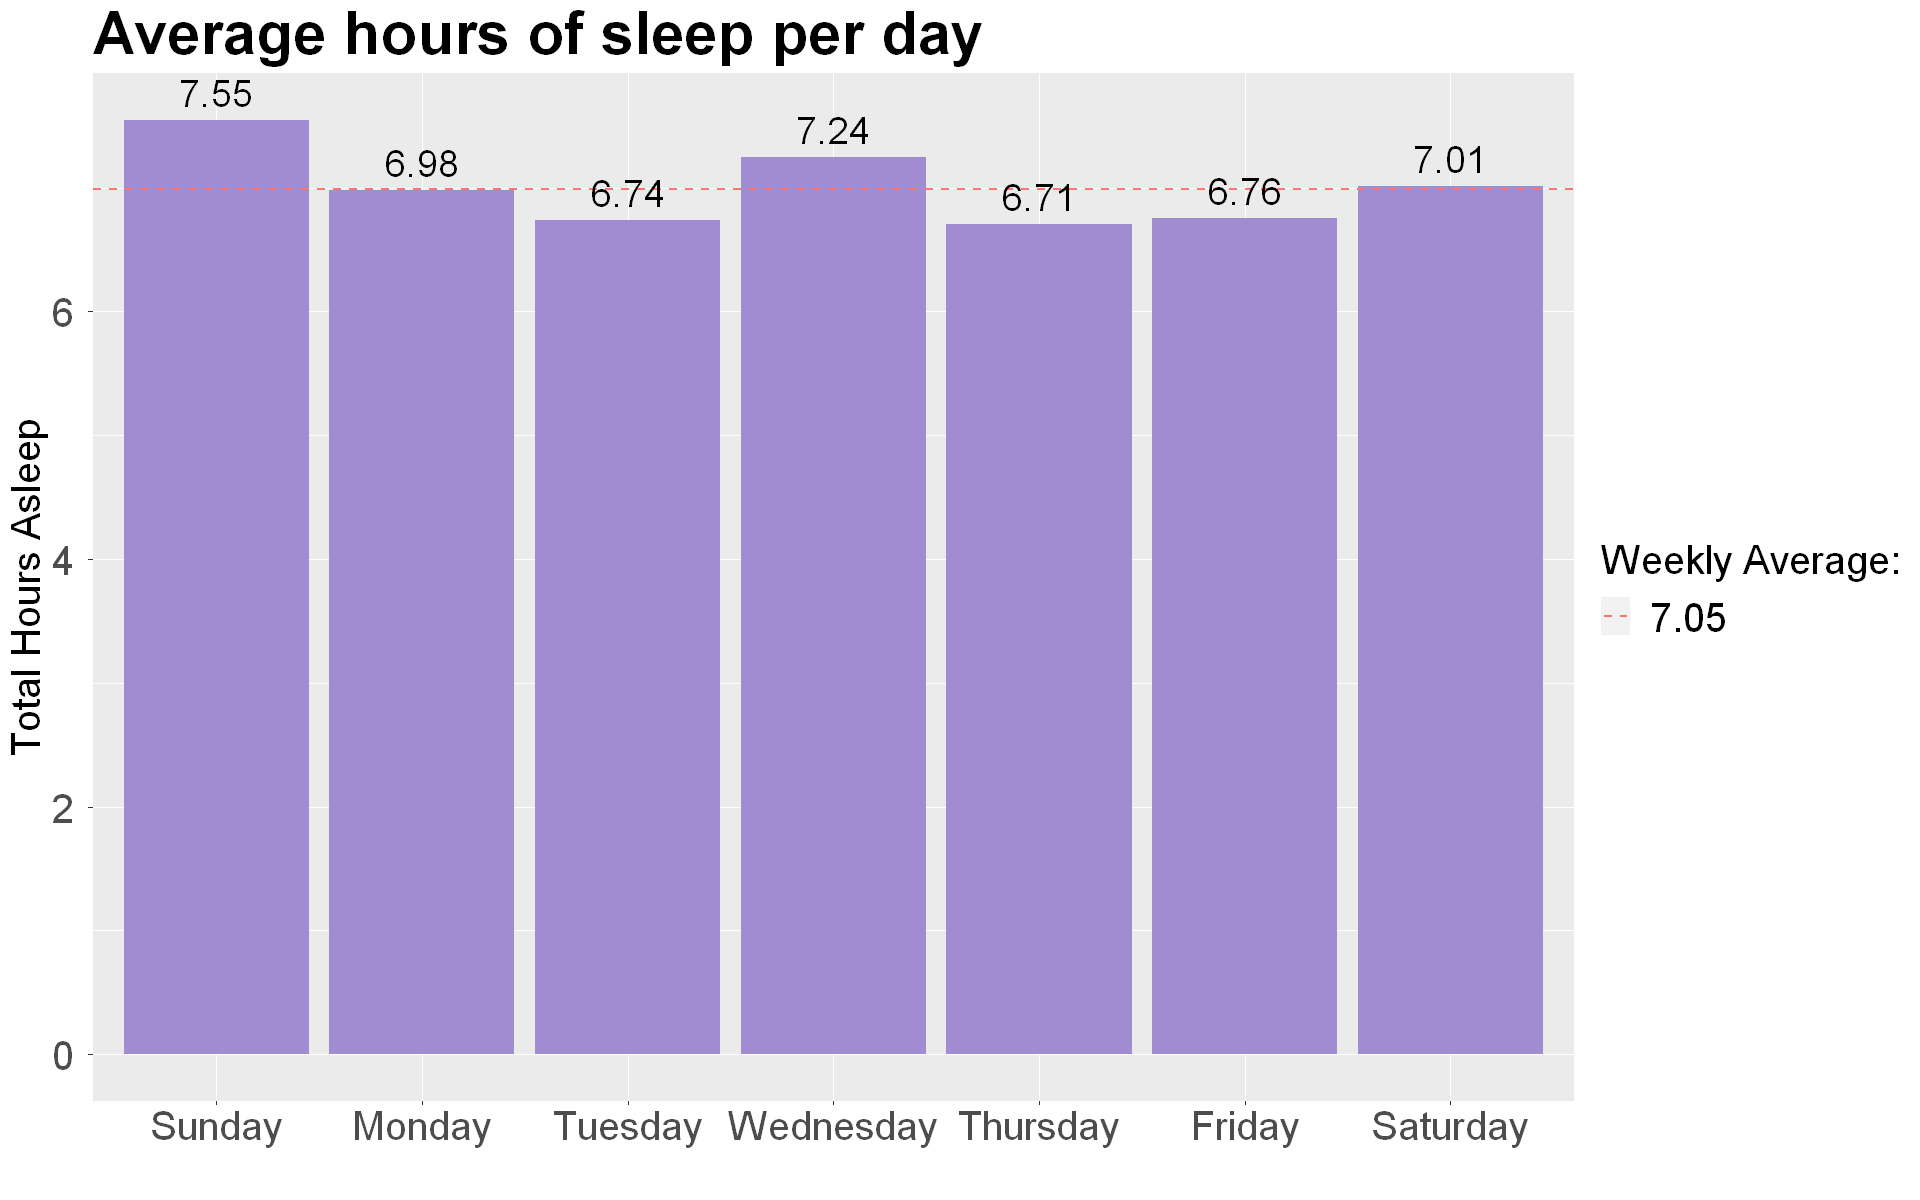

In [89]:
daily_sleep <- read_csv("Fitabase Data 4.12.16-5.12.16/sleepDay_merged.csv", show_col_types = FALSE)
# Making a day_of_week column inside daily_sleep for plots
daily_sleep <- daily_sleep %>%
  mutate(day_of_week = weekdays(as.Date(SleepDay, format = "%m/%d/%Y")))


# Creating a new tibble out of daily_sleep to work with exclusively for one plot
daily_sleep_avg <- daily_sleep %>%
  group_by(day_of_week) %>%
  summarize(avg_minutes_asleep = mean(TotalMinutesAsleep))


# Ordering day_of_week in the desired order
daily_sleep_avg$day_of_week <- factor(daily_sleep_avg$day_of_week, levels = c(
  "Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"))

options(repr.plot.width = 16, repr.plot.height = 10)

ggplot(data = daily_sleep_avg, aes(x = day_of_week, y = avg_minutes_asleep)) +
  geom_col(fill = "#A18CD1") +
  geom_hline(aes(yintercept = mean(daily_sleep$TotalMinutesAsleep), color = "7.05"), linetype = "dashed", size = .75) +
  geom_text(aes(label = sprintf("%.2f", avg_minutes_asleep/60)), vjust = -0.5, color = "black", size = 8) +
  labs(title = "Average hours of sleep per day", x = "", y = "Total Hours Asleep") +
  scale_y_continuous(breaks = seq(0, ceiling(max(daily_sleep_avg$avg_minutes_asleep)), 120),
                     labels = function(x) paste0(x / 60, " ")) +
  guides(color = guide_legend(title = "Weekly Average:")) +
  theme(plot.title = element_text(size = 36, face = "bold"),
        axis.text.x = element_text(size = 24),
        axis.text.y = element_text(size = 24),
        axis.title = element_text(size = 24),
        legend.text = element_text(size = 24),
        legend.title = element_text(size = 24))

* The average total sleep is 7.05 hours

In [90]:
# Showing the average daily sleep in DESC order in hours
head(select(arrange(mutate(daily_sleep_avg, 
                           avg_hours_asleep = round(avg_minutes_asleep / 60, 2)), 
                    desc(avg_hours_asleep)), day_of_week, avg_hours_asleep), 7)

day_of_week,avg_hours_asleep
<fct>,<dbl>
Sunday,7.55
Wednesday,7.24
Saturday,7.01
Monday,6.98
Friday,6.76
Tuesday,6.74
Thursday,6.71


### <span style="color:#6B8E23"> Daily Steps Plot </span>

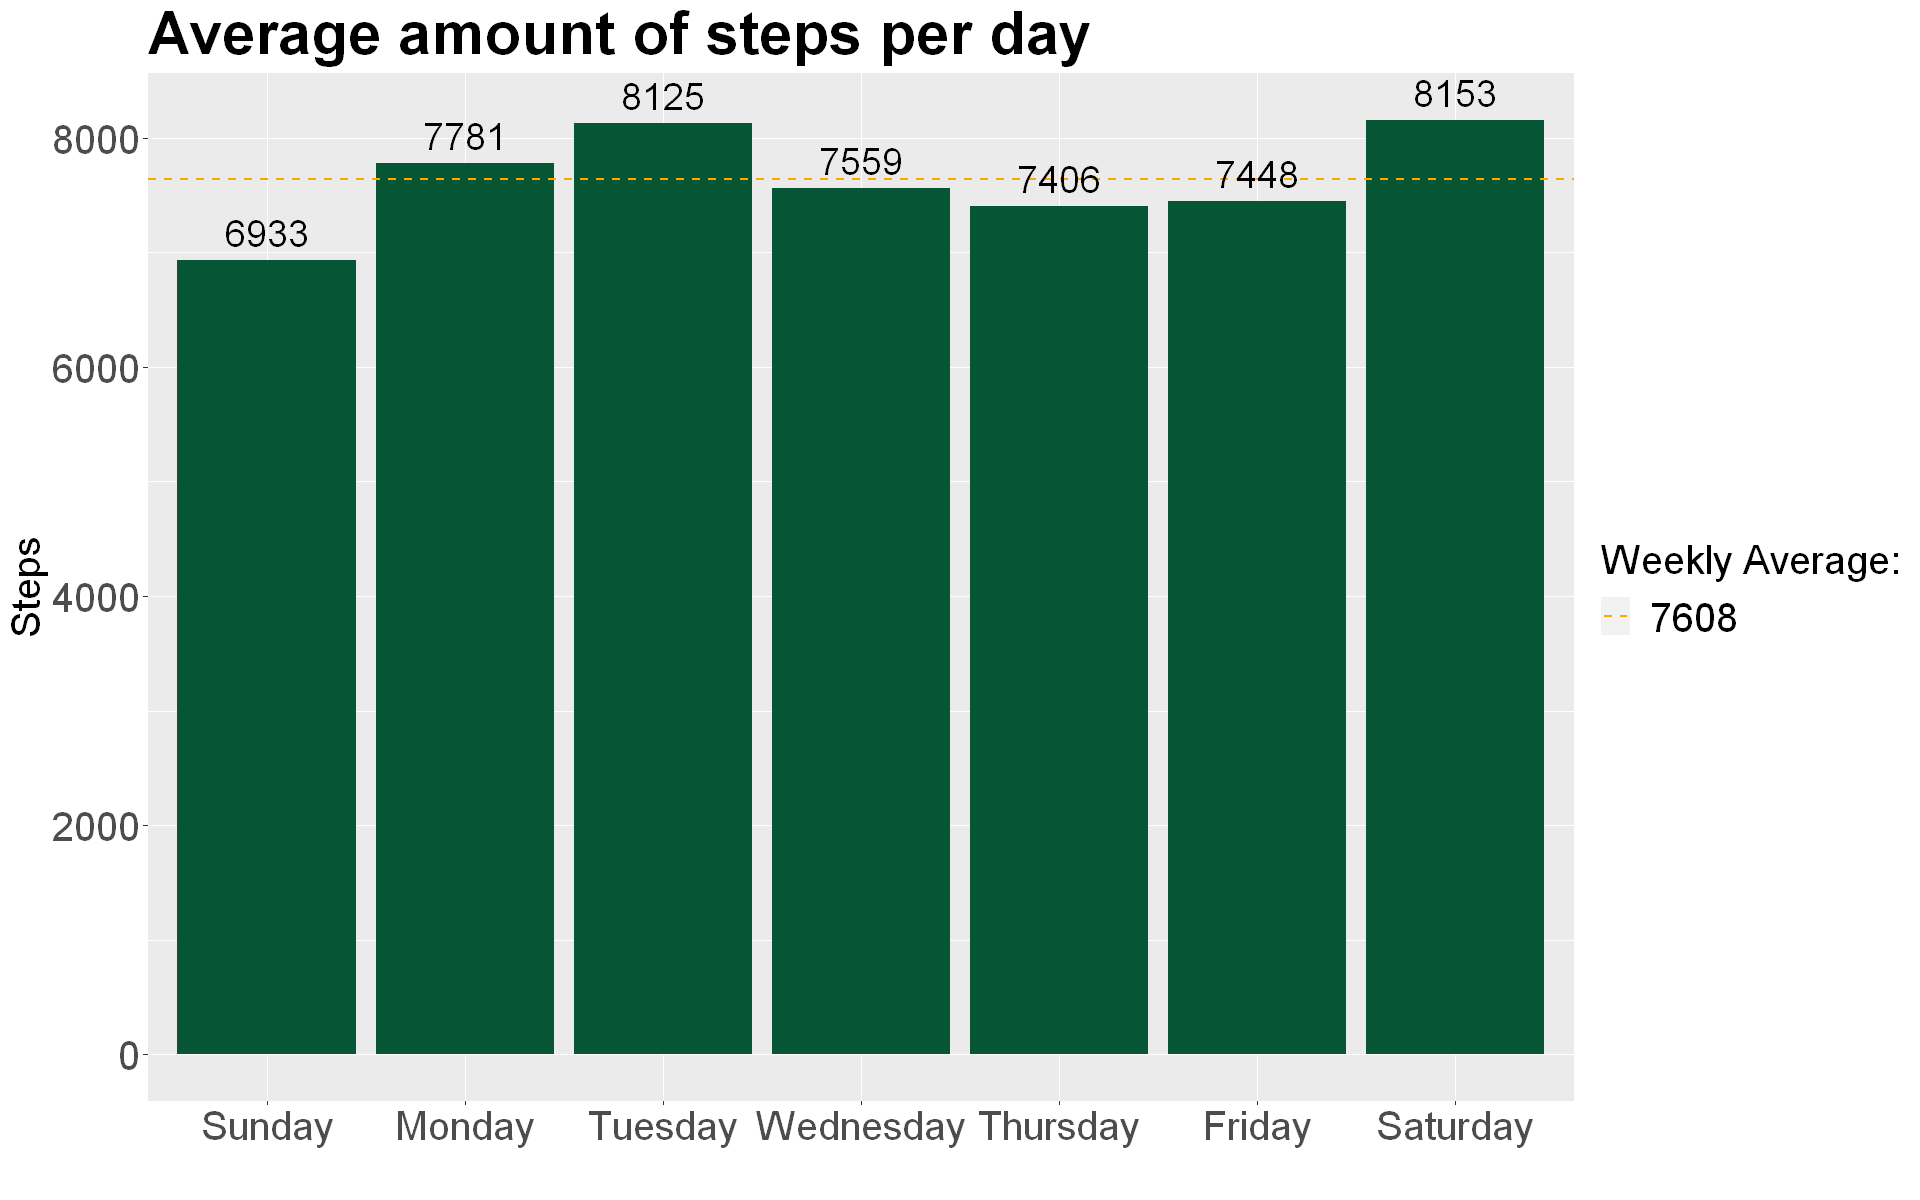

In [91]:
daily_activity <- readr::read_csv("Fitabase Data 4.12.16-5.12.16/dailyActivity_merged.csv", show_col_types = FALSE)

# Making a day_of_week column inside daily_activity for plots
daily_activity <- daily_activity %>%
  mutate(day_of_week = weekdays(as.Date(ActivityDate, format = "%m/%d/%Y")))


# Reordering day_of_week in the desired order
daily_activity$day_of_week <- factor(daily_activity$day_of_week, levels = c(
  "Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"))


# Creating a new tibble out of daily_activity to work for one plot
daily_activity_avg <- daily_activity %>%
  group_by(day_of_week) %>%
  summarize(avg_steps = mean(TotalSteps))


options(repr.plot.width = 16, repr.plot.height = 10)

# Daily activity avg plot with a legend
ggplot(data = daily_activity_avg, aes(x = day_of_week, y = avg_steps)) +
  geom_col(fill = "#065535") +
  geom_hline(aes(yintercept = mean(daily_activity$TotalSteps), color = "7608"), linetype = "dashed", size = .75) +
  geom_text(aes(label = round(avg_steps)), vjust = -0.5, color = "black", size = 8) +
  labs(title = "Average amount of steps per day", x = "", y = "Steps") +
  scale_color_manual(values = "orange") +
  guides(color = guide_legend(title = "Weekly Average:")) +
  theme(plot.title = element_text(size = 36, face = "bold"),
        axis.text.x = element_text(size = 24),
        axis.text.y = element_text(size = 24),
        axis.title = element_text(size = 24),
        legend.text = element_text(size = 24),
        legend.title = element_text(size = 24))


* The avg total steps is 7608.43

In [92]:
# Showing the average daily steps in DESC order by day
head(arrange(daily_activity_avg, desc(avg_steps)), 7)

day_of_week,avg_steps
<fct>,<dbl>
Saturday,8152.976
Tuesday,8125.007
Monday,7780.867
Wednesday,7559.373
Friday,7448.230
Thursday,7405.837
Sunday,6933.231


### <span style="color:#6B8E23"> Daily Average Calories Plot </span>

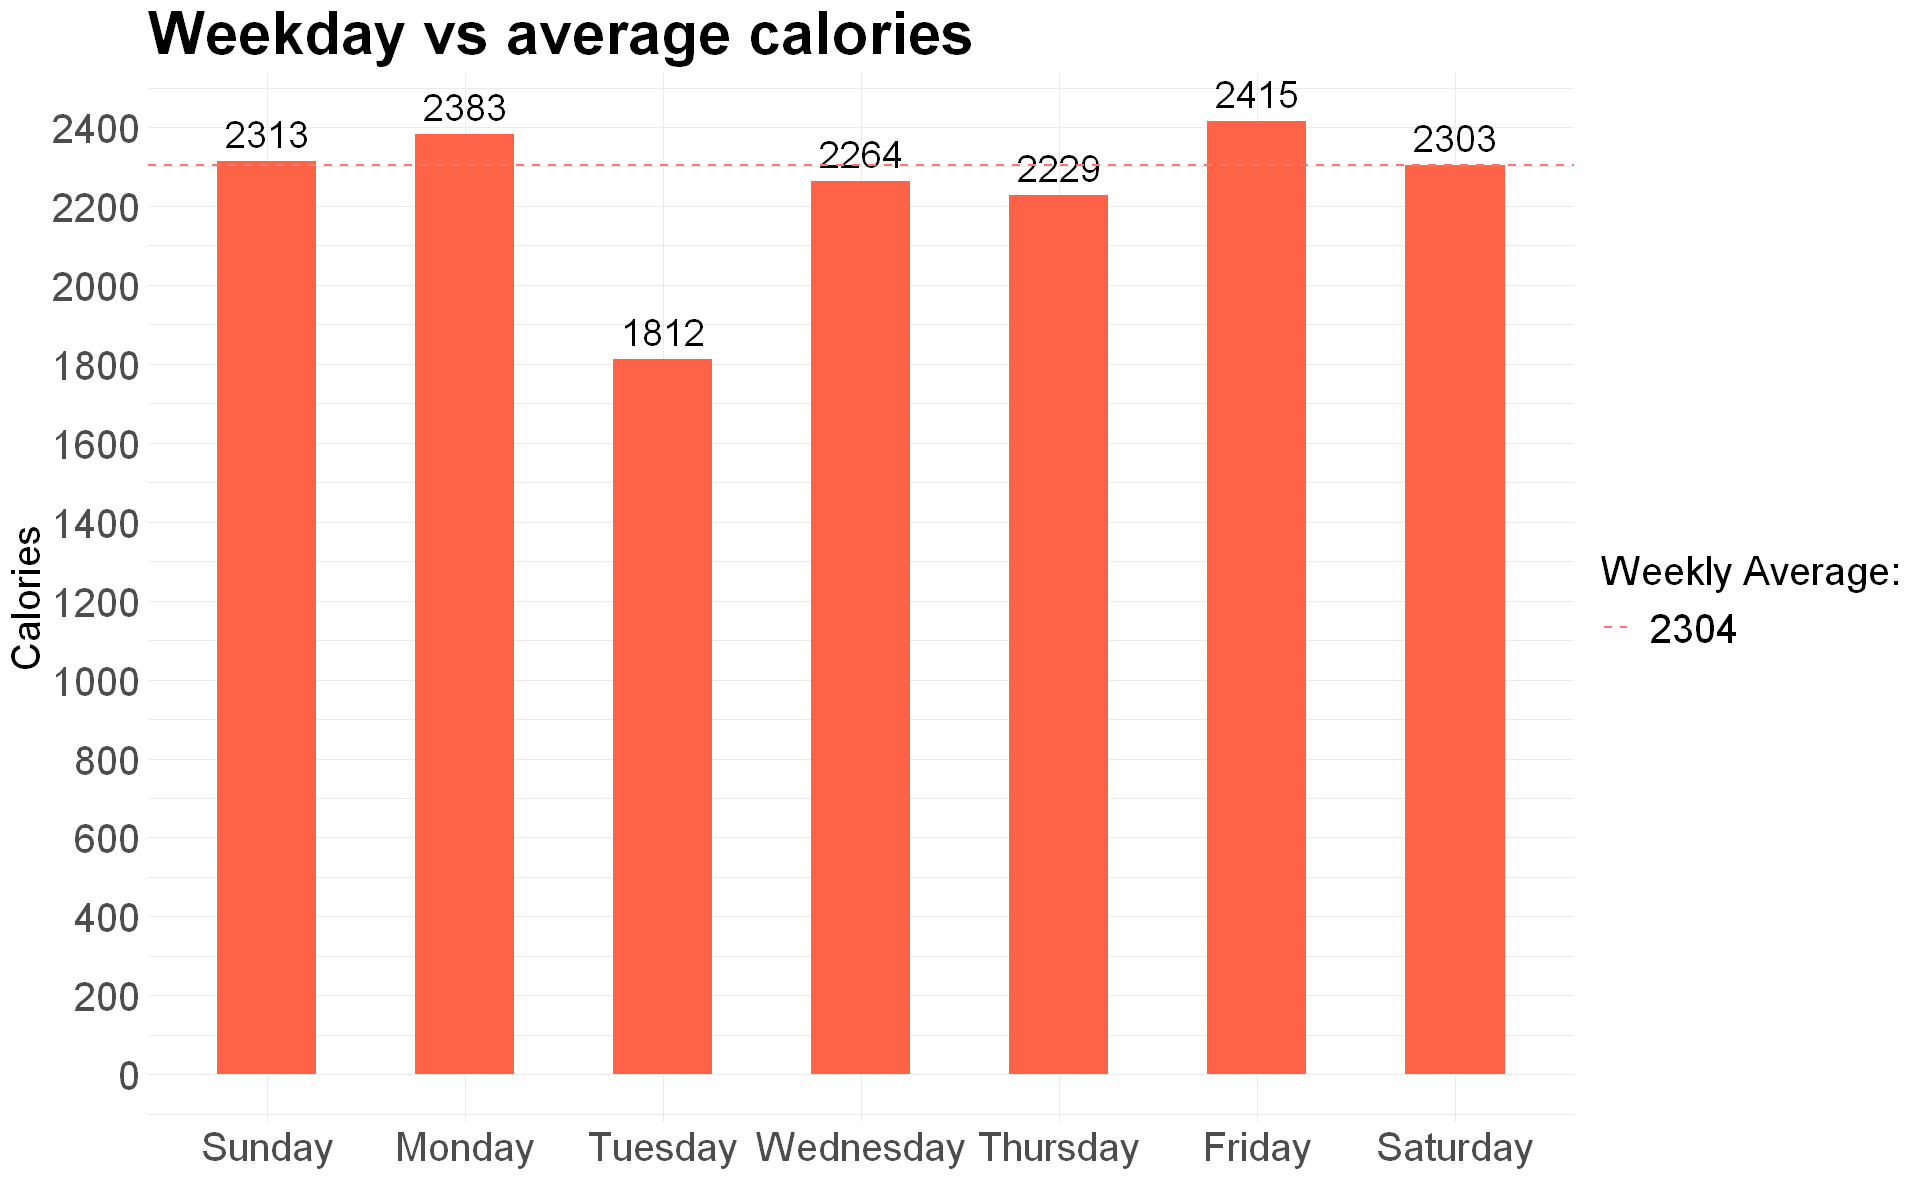

In [93]:
daily_activity <- readr::read_csv("Fitabase Data 4.12.16-5.12.16/dailyActivity_merged.csv", show_col_types = FALSE);



# Weekday vs average calories 
daily_activity$ActivityDate <- as.Date(daily_activity$ActivityDate)
daily_activity$Weekday <- weekdays(daily_activity$ActivityDate)



# Aggregating calories
weekday_calories <- aggregate(Calories ~ Weekday, data = daily_activity, FUN = function(x) mean(x, na.rm = TRUE))



# Proper mean
average_calories <- mean(daily_activity$Calories, na.rm = TRUE)



# Reordering day_of_week in the desired order
weekday_calories$Weekday <- factor(weekday_calories$Weekday, levels = c(
  "Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"))



# Removing decimals
weekday_calories$Calories <- floor(weekday_calories$Calories)

options(repr.plot.width = 16, repr.plot.height = 10)

# Plot days vs average calories with a legend
ggplot(weekday_calories, aes(x = Weekday, y = Calories)) +
  geom_bar(stat = "identity", fill = "#FF6347", width = 0.5) +
  geom_text(aes(label = Calories), vjust = -0.5, color = "black", size = 8) +
  geom_hline(aes(yintercept = average_calories, color = "2304"), linetype = "dashed", size = 0.75) +
  labs(title = "Weekday vs average calories", x = "", y = "Calories") +
  scale_y_continuous(breaks = seq(0, max(weekday_calories$Calories), by = 200)) +
  theme_minimal() +
  theme(legend.position = "right",
        legend.title = element_text(size = 24),
        legend.text = element_text(size = 24),
        plot.title = element_text(size = 36, face = "bold"),
        axis.text.y = element_text(size = 24),
        axis.text.x = element_text(size = 24), 
        axis.title.y = element_text(size = 24)) +
  guides(color = guide_legend(title = "Weekly Average:", ncol = 1))

* The average calories is 2304 

In [94]:
# Showing the average calories in DESC order
head(arrange(weekday_calories, desc(Calories)), 7)

,Weekday,Calories
,<fct>,<dbl>
1,Friday,2415
2,Monday,2383
3,Sunday,2313
4,Saturday,2303
5,Wednesday,2264
6,Thursday,2229
7,Tuesday,1812


### <span style="color:#6B8E23"> Total Steps and Activity Level vs. Calories Plot </span>

`geom_smooth()` using formula = 'y ~ x'


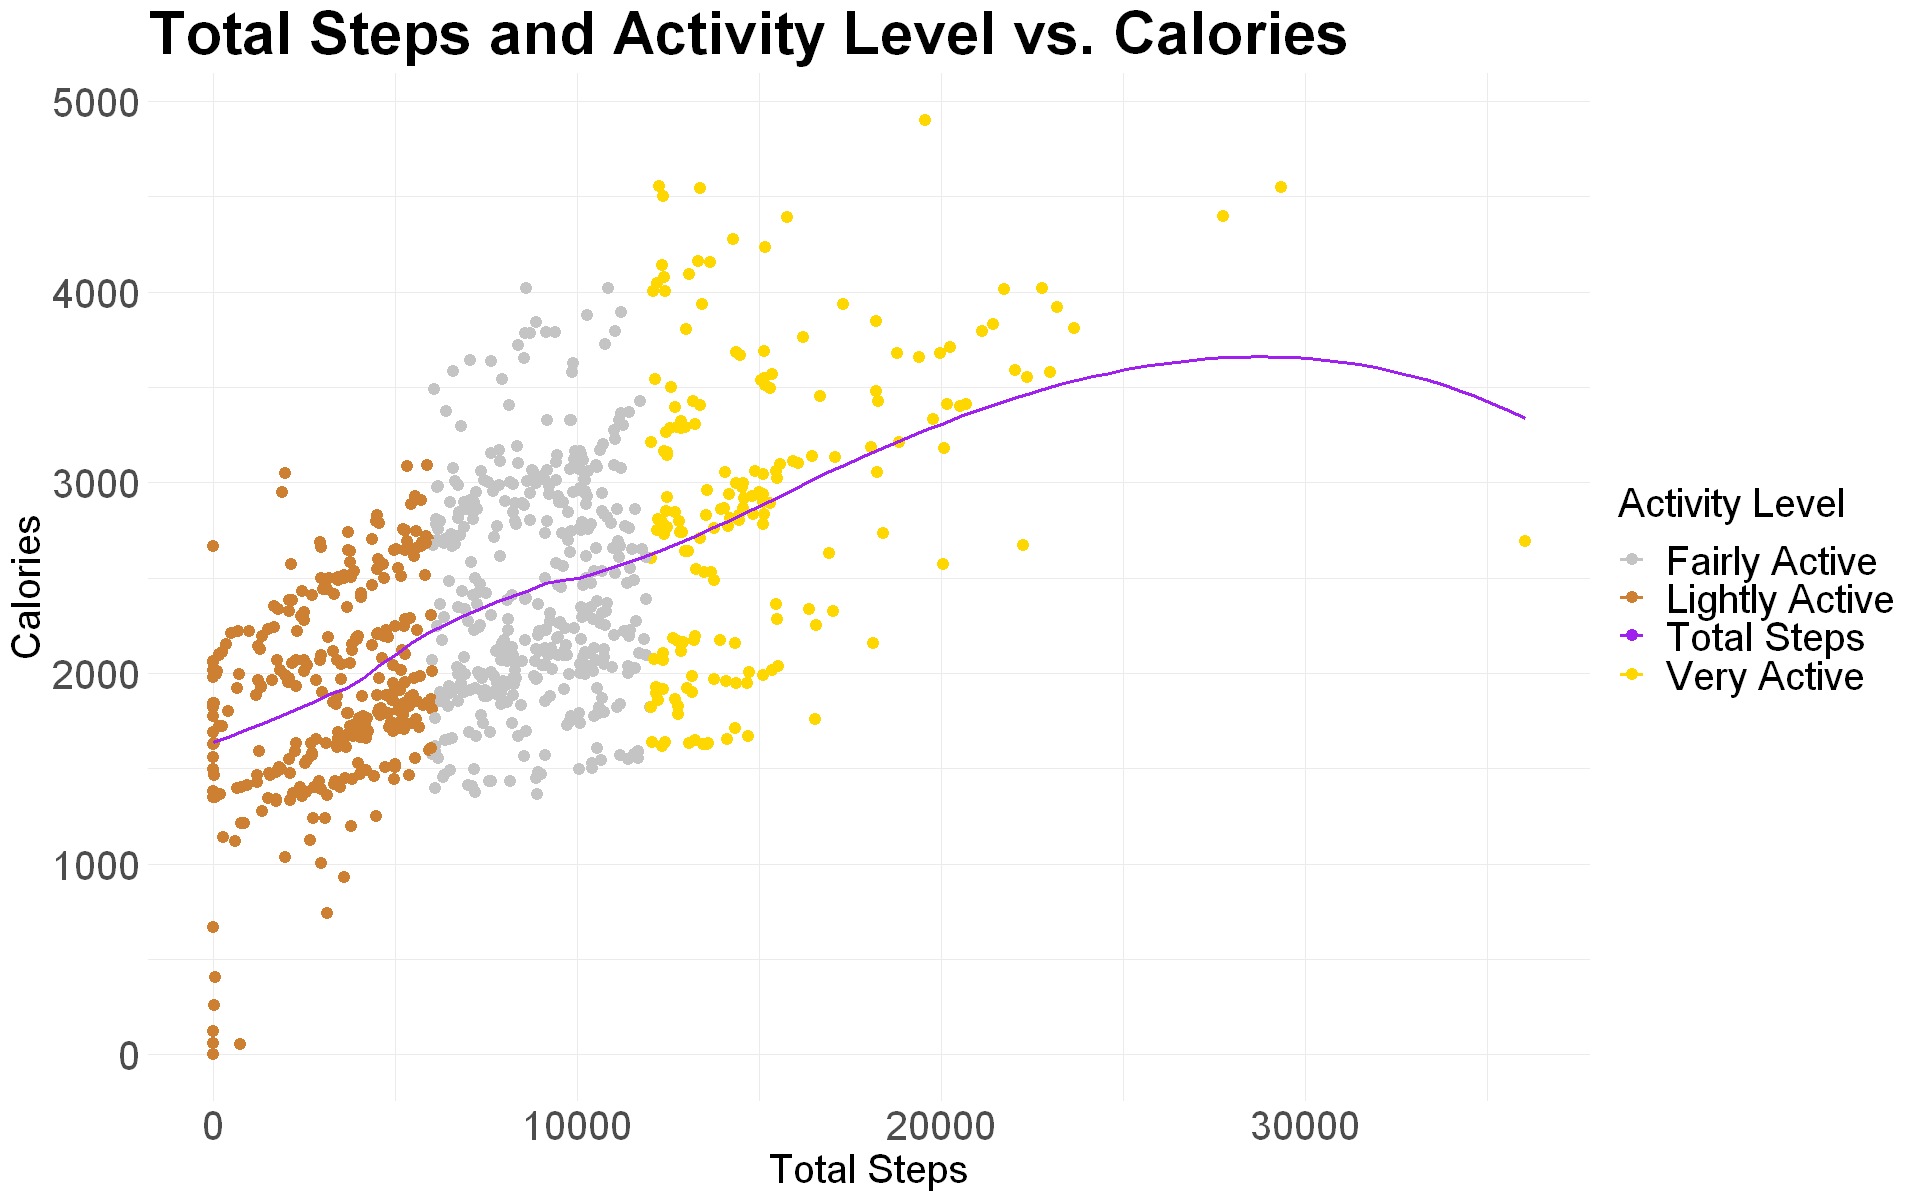

In [95]:
options(repr.plot.width = 16, repr.plot.height = 10)

# Total_Steps vs Calories with a legend
ggplot(data = daily_activity, aes(x = TotalSteps, y = Calories)) +
  geom_point(aes(color = ifelse(TotalSteps <= 6000, "Lightly Active",
                                ifelse(TotalSteps <= 12000, "Fairly Active", "Very Active"))), size = 3) +
  geom_smooth(aes(color = "Total Steps"), method = "loess", se = FALSE, fill = "purple", alpha = 0.2, span = 0.5, size = 1) + 
  labs(title = "Total Steps and Activity Level vs. Calories", x = "Total Steps", y = "Calories", color = "Activity Level") +
  scale_color_manual(values = c("Lightly Active" = "#CD7F32", "Fairly Active" = "#C4C4C4", "Very Active" = "#FFD700", "Total Steps" = "purple")) +
  theme_minimal() +
  theme(plot.title = element_text(size = 36, face = "bold"),
        axis.text.x = element_text(size = 24),
        axis.text.y = element_text(size = 24),
        axis.title = element_text(size = 24),
        legend.title = element_text(size = 24),
        legend.text = element_text(size = 24))

### <span style="color:#6B8E23"> Sleep vs Activity Plot </span>

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


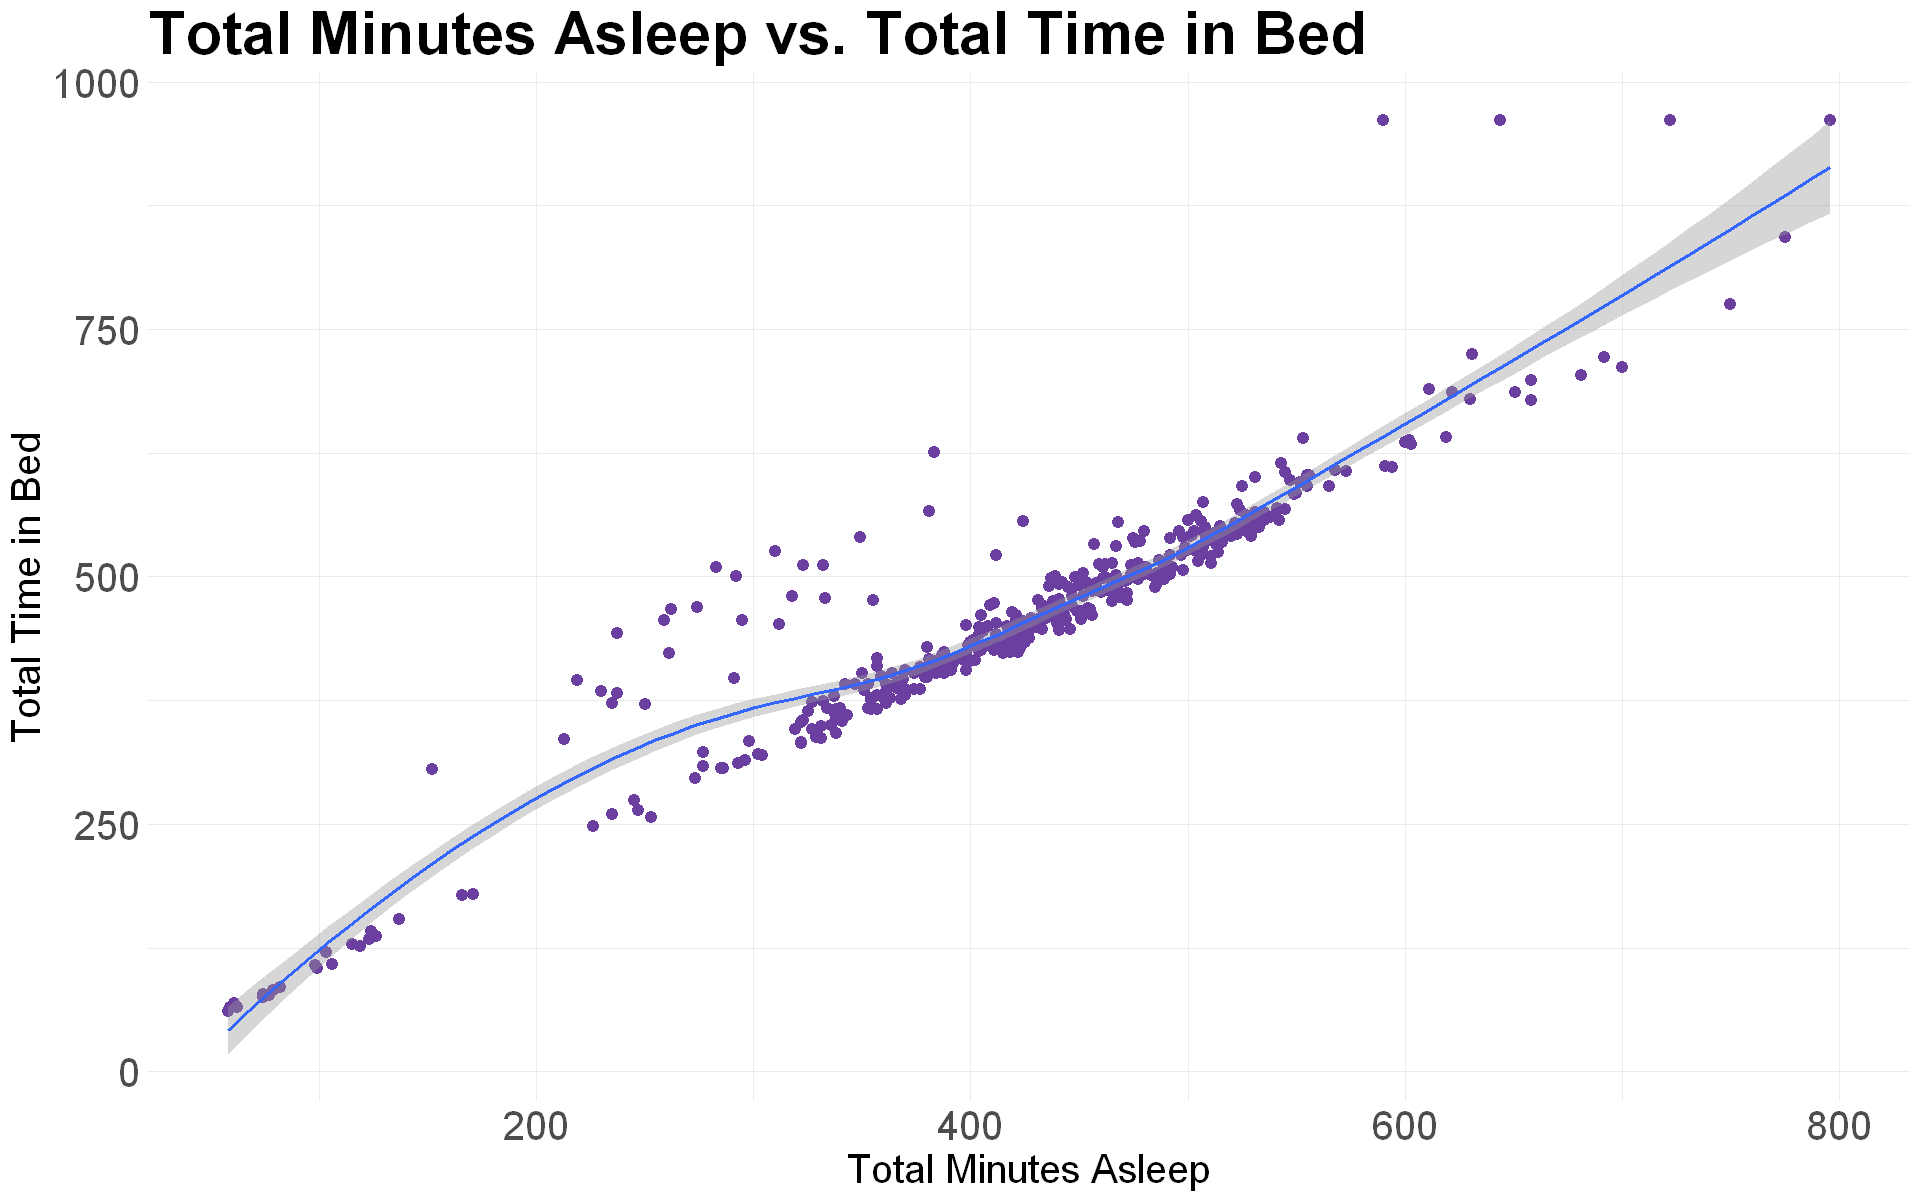

In [96]:
options(repr.plot.width = 16, repr.plot.height = 10)

# TotalMinutesAsleep vs TotalTimeInBed
ggplot(data = daily_sleep, aes(x = TotalMinutesAsleep, y = TotalTimeInBed)) + 
  geom_point(color = "#6B3FA0", size = 3) + 
  geom_smooth() + 
  labs(title = "Total Minutes Asleep vs. Total Time in Bed", x = "Total Minutes Asleep", y = "Total Time in Bed") +
  theme_minimal() +
  theme(plot.title = element_text(size = 36, face = "bold"),
        axis.text.x = element_text(size = 24),
        axis.text.y = element_text(size = 24),
        axis.title = element_text(size = 24))

### <span style="color:#6B8E23"> Total Steps vs Total Minutes Asleep Plot </span>

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


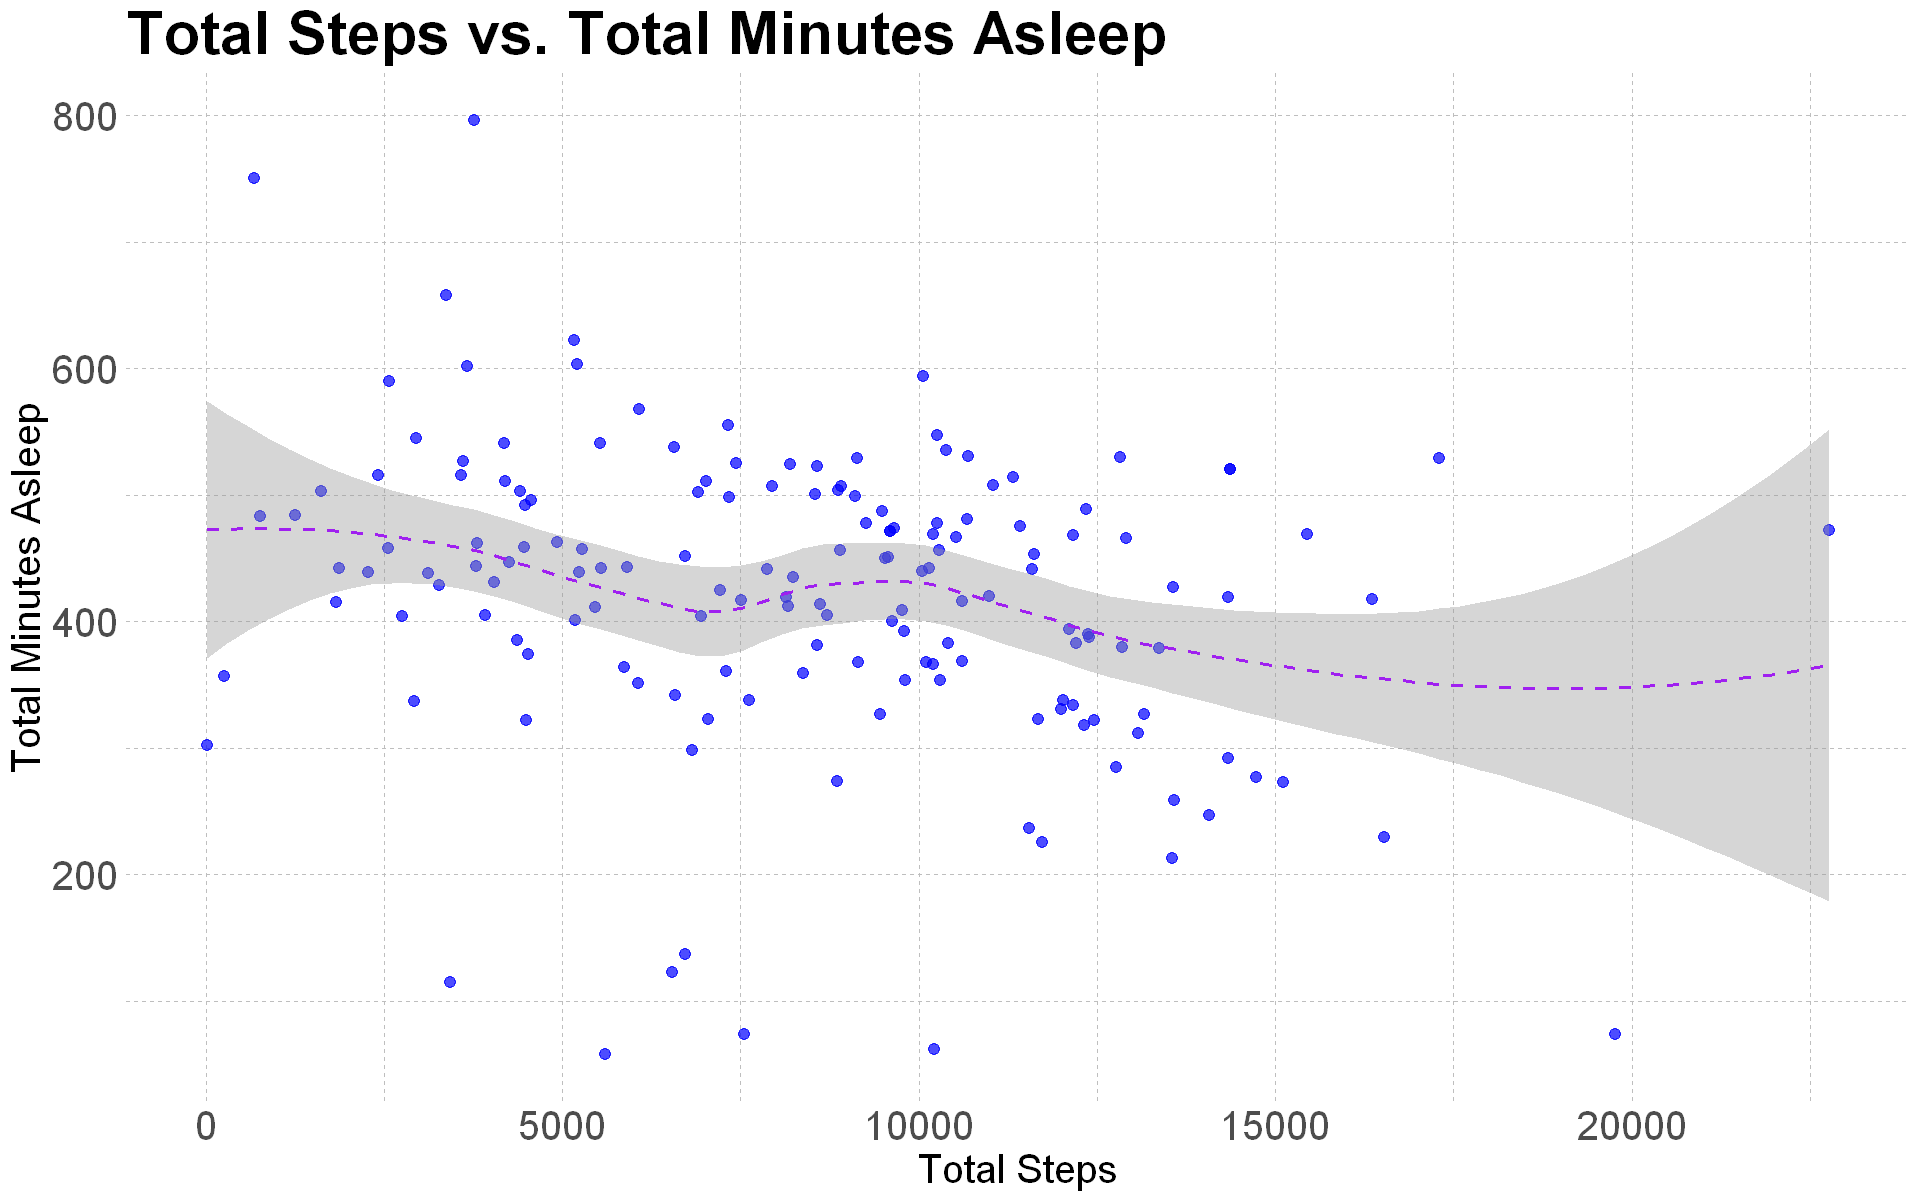

In [97]:
# Rename SleepDay column in daily_sleep to date
daily_sleep <- daily_sleep %>%
  rename(date = SleepDay)


# Rename ActivityDate column in daily_activity to date
daily_activity <- daily_activity %>%
  rename(date = ActivityDate)



# Convert date columns to the desired format MM/DD/YYYY
daily_sleep$date <- format(as.Date(daily_sleep$date), "%m/%d/%Y")
daily_activity$date <- format(as.Date(daily_activity$date), "%m/%d/%Y")



# Merge data based on Id and date columns
merged_data <- merge(daily_activity[, c("Id", "TotalSteps", "date")], 
                     daily_sleep[, c("Id", "TotalMinutesAsleep", "date")], 
                     by = c("Id", "date"), all = TRUE)


# Remove rows with missing values
merged_data <- na.omit(merged_data)


options(repr.plot.width = 16, repr.plot.height = 10)

# Plot TotalSteps vs TotalMinutesAsleep
ggplot(merged_data, aes(x = TotalSteps, y = TotalMinutesAsleep)) +
  geom_point(color = "blue", size = 3, alpha = 0.7) +
  geom_smooth(color = "purple", linetype = "dashed", size = 1) +
  labs(title = "Total Steps vs. Total Minutes Asleep", x = "Total Steps", y = "Total Minutes Asleep") +
  theme_minimal() +
  theme(plot.title = element_text(size = 36, face = "bold"),
        axis.text.x = element_text(size = 24),
        axis.text.y = element_text(size = 24),
        axis.title = element_text(size = 24),
        panel.grid = element_line(color = "gray", linetype = "dashed"))


* This doesn't look like much, but that's the point. Regardless of the amount of walking, there was no correlation to getting more sleep.

* When a plot has a horizontal line through it, it shows a lack of correlation. Which is a good thing to understand, and this information is as lackluster as it is may surprise many users. One of the many examples of how our product improves the users lives. Knowledge is power, after all. 

### <span style="color:#6B8E23"> Correlation of Total Steps and Calories Plot </span>

`geom_smooth()` using formula = 'y ~ x'


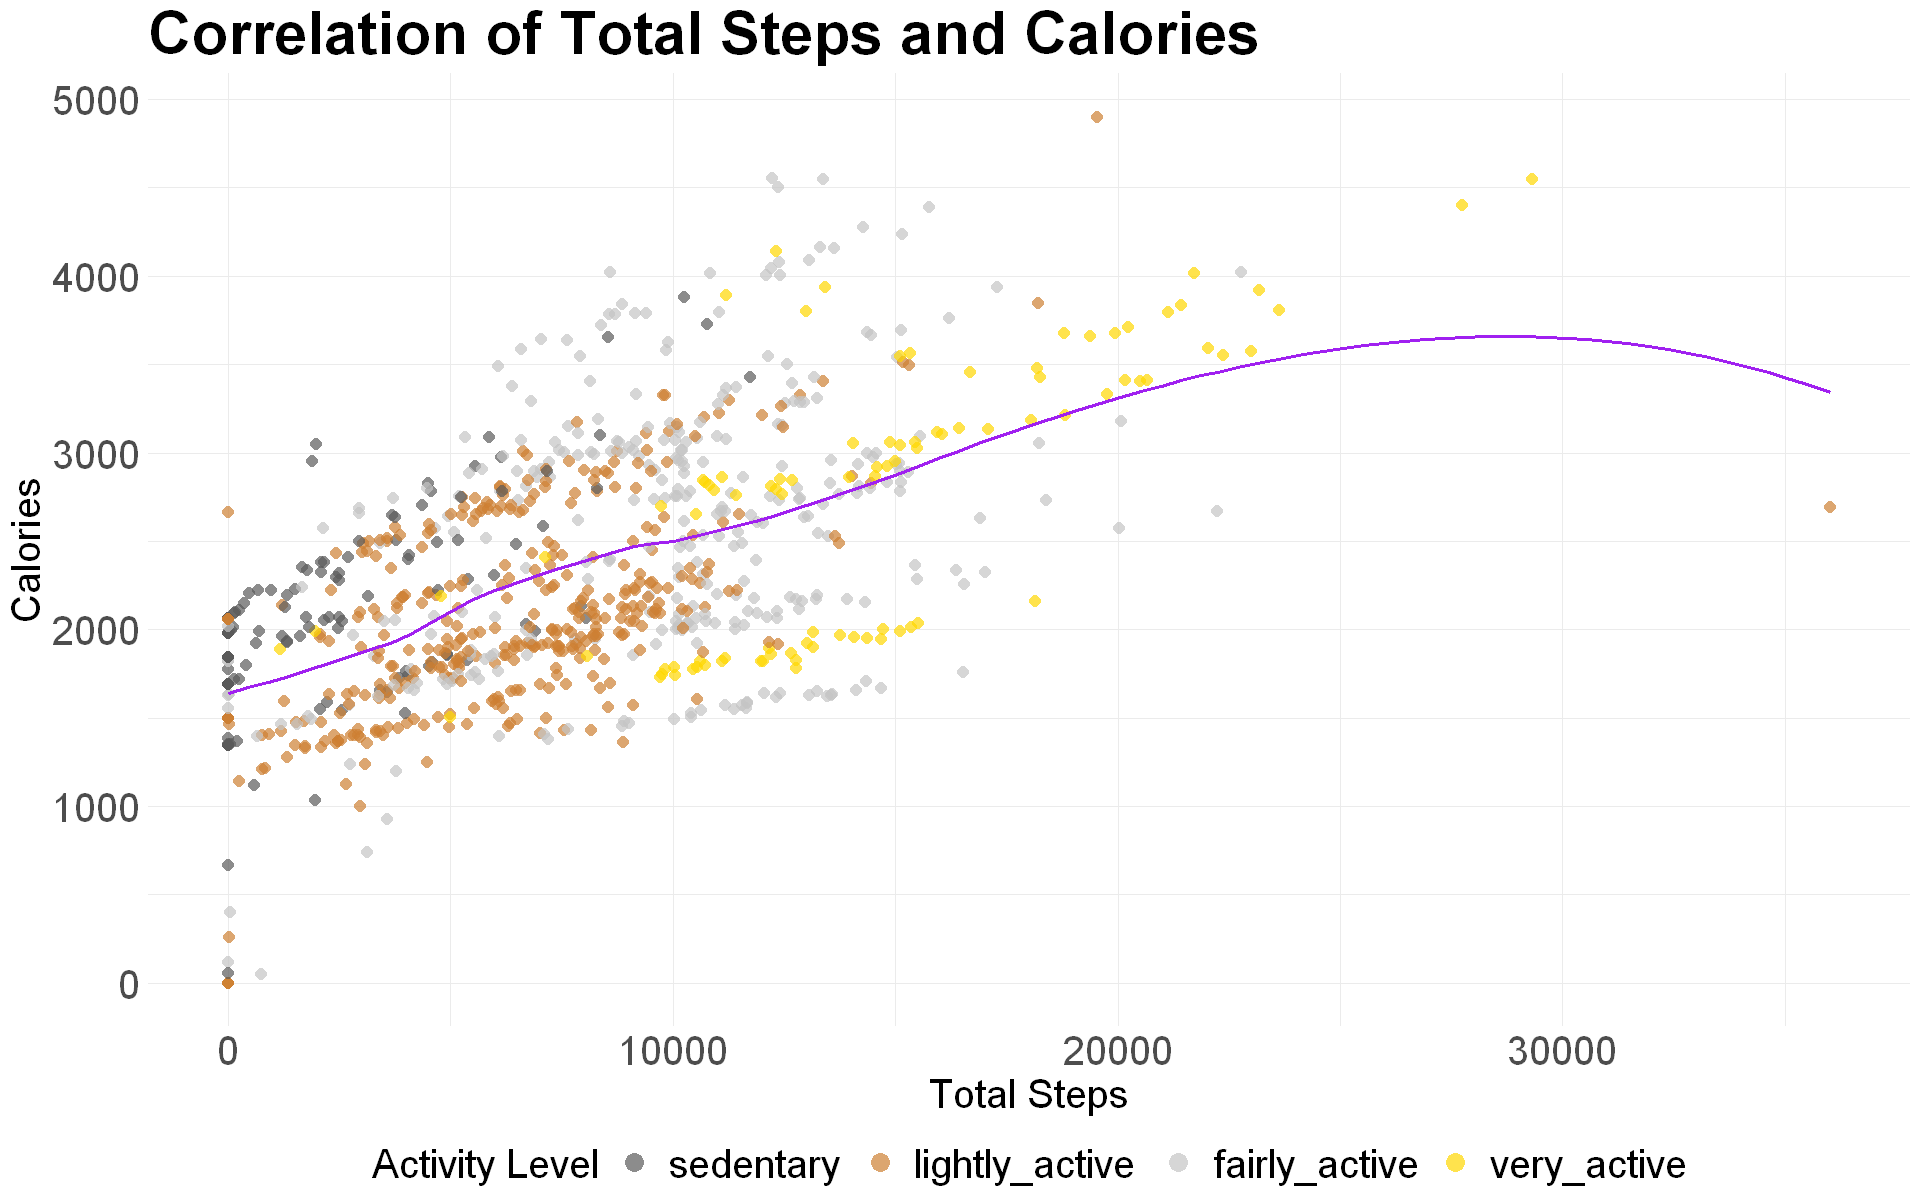

In [98]:
# Group the data by 'Id'
id_grp <- daily_activity %>% group_by(Id)



# Calculate the average amount of steps and sort in descending order
id_avg_step <- id_grp %>% summarize(avg_steps = mean(TotalSteps)) %>% arrange(desc(avg_steps))



# Convert the result to a dataframe
id_avg_step <- as.data.frame(id_avg_step)



# Create a column 'activity_level' based on average step categories
id_avg_step$activity_level <- cut(id_avg_step$avg_steps,
                                  breaks = c(-Inf, 4000, 8000, 12000, Inf),
                                  labels = c("sedentary", "lightly_active", "fairly_active", "very_active"),
                                  right = FALSE)



# Create a vector with activity levels for each 'Id' in the original dataframe
id_activity_level <- id_avg_step$activity_level[match(daily_activity$Id, id_avg_step$Id)]



# Add 'activity_level' column to the original dataframe
daily_activity$activity_level <- id_activity_level

options(repr.plot.width = 16, repr.plot.height = 10)

# Correlation between calories steps and calories
ggplot(daily_activity, aes(x = TotalSteps, y = Calories, color = activity_level)) +
  geom_point(shape = 16, size = 3, alpha = 0.7) +
  geom_smooth(method = "loess", se = FALSE, color = "purple", fill = "purple", alpha = 0.2, span = 0.5, size = 1) + 
  labs(title = "Correlation of Total Steps and Calories", x = "Total Steps", y = "Calories", color = "Activity Level") +
  theme_minimal() +
  scale_color_manual(values = c("sedentary" = "#5A5A5A", "lightly_active" = "#CD7F32", "fairly_active" = "#C4C4C4", "very_active" = "#FFD700"),
                     guide = guide_legend(override.aes = list(size = 5))) + 
  theme(plot.title = element_text(size = 36, face = "bold"),
        axis.text.x = element_text(size = 24),
        axis.text.y = element_text(size = 24),
        axis.title = element_text(size = 24),
        legend.text = element_text(size = 24),
        legend.title = element_text(size = 24),
        legend.position = "bottom")  


* The reason 36019 Total Steps is labeled as "lightly_active" is because the user only walked such "very active" amounts on one day; the rest dragged them down. My plot legend takes into account the average activity level, not individual records.

### <span style="color:#6B8E23"> Percentage of Activity in Minutes Plot </span>

* Very active minutes :  1.74% 
* Fairly active minutes :  1.11% 
* Lightly active minutes :  15.82% 
* Sedentary minutes :  81.33% 

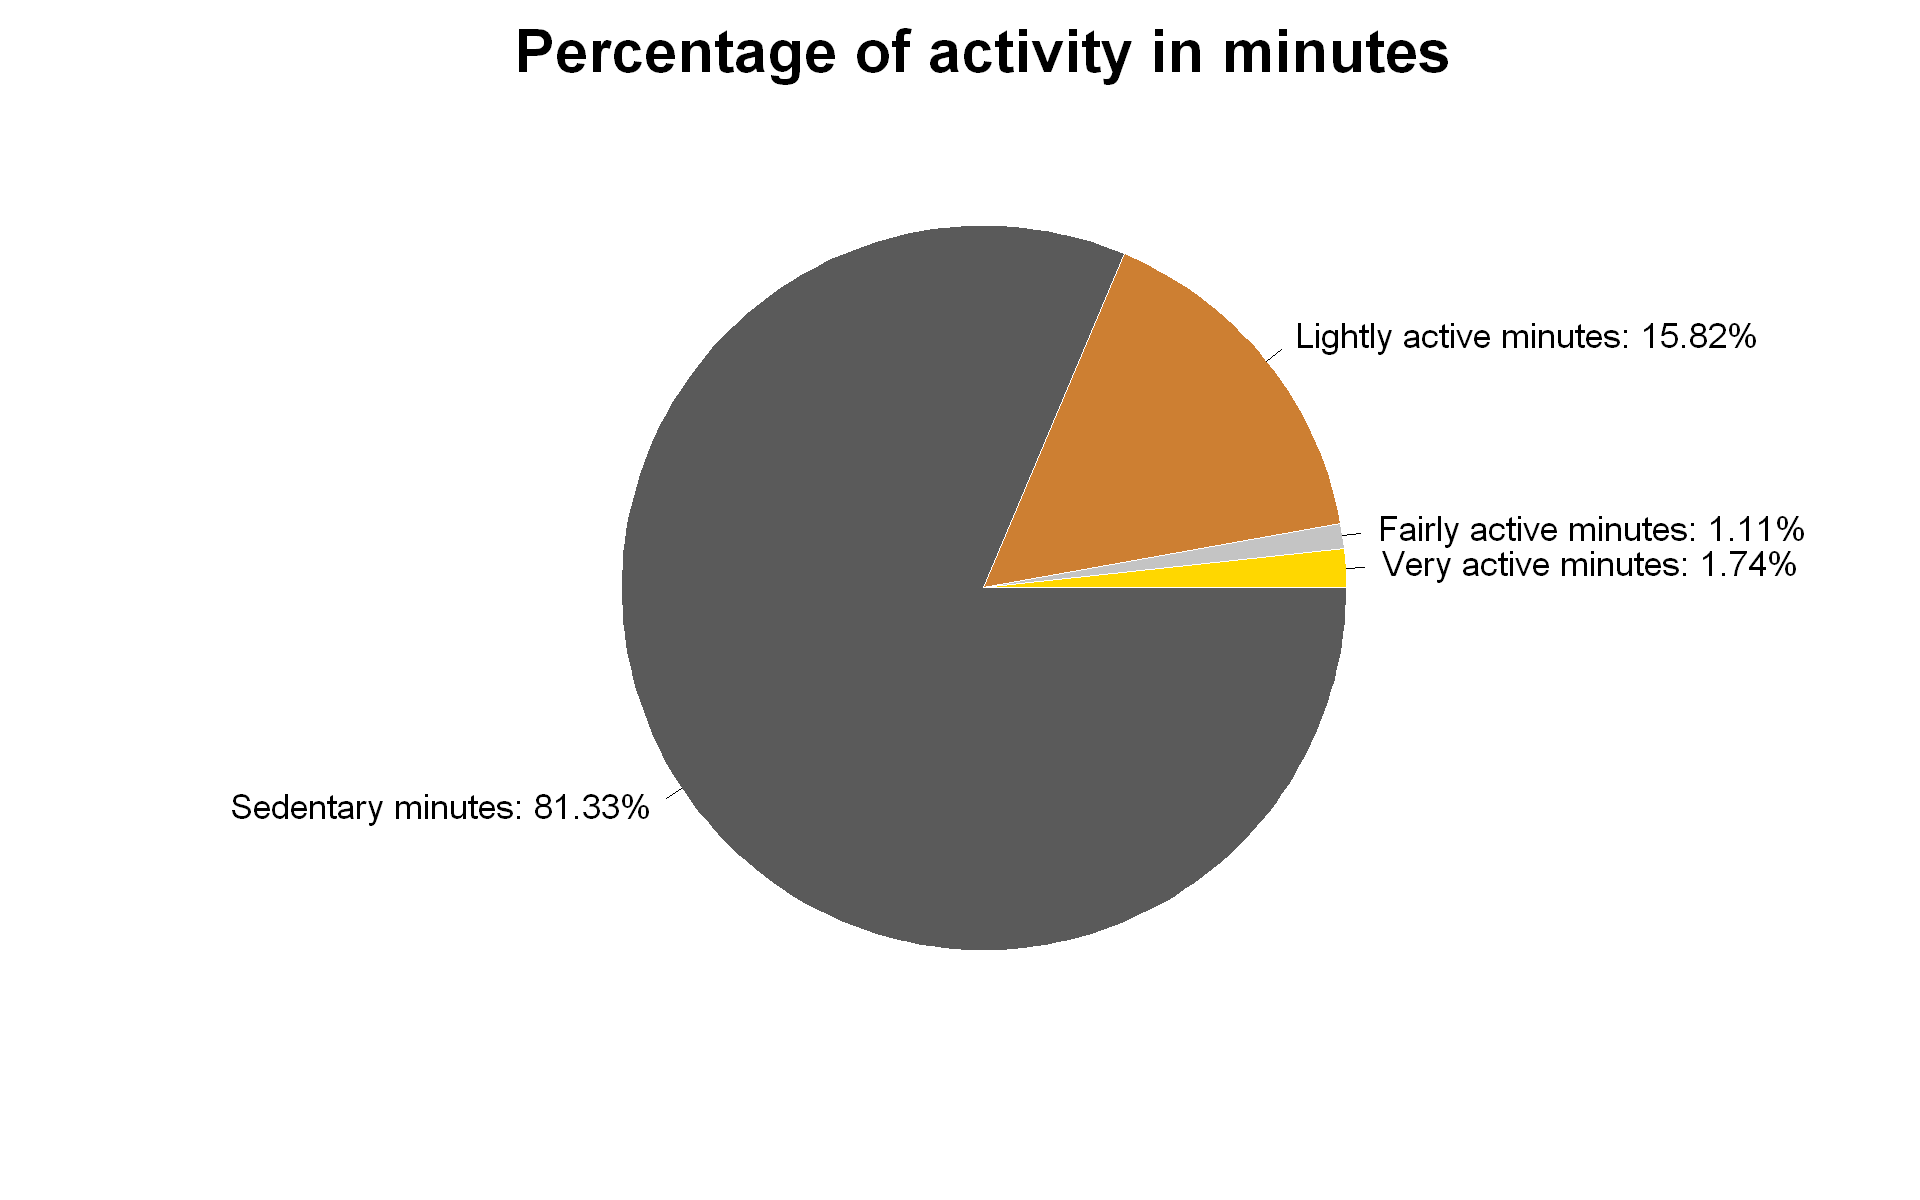

In [99]:
# Percent of activity in minutes
very_active_mins <- sum(daily_activity$VeryActiveMinutes)
fairly_active_mins <- sum(daily_activity$FairlyActiveMinutes)
lightly_active_mins <- sum(daily_activity$LightlyActiveMinutes)
sedentary_mins <- sum(daily_activity$SedentaryMinutes)


slices <- c(very_active_mins, fairly_active_mins, lightly_active_mins, sedentary_mins)
labels <- c('Very active minutes: 1.74%', 'Fairly active minutes: 1.11%', 'Lightly active minutes: 15.82%', 'Sedentary minutes: 81.33%')


colors <- c("#FFD700", "#C4C4C4", "#CD7F32", "#5A5A5A")


options(repr.plot.width = 16, repr.plot.height = 10)


pie(slices, labels = labels,
    main = 'Percentage of activity in minutes',
    col = colors,
border = "white", cex.main = 3, cex.lab = 1.5, cex.axis = 1.5, cex = 1.75)

## <span style="color:#6B8E23"> Act - Step 6: Conclusion and Next Steps </span>

## <span style="color:#6B8E23"> Conclusion </span>

After analyzing Bellabeat's data, I have found some insights that would help influence Bellabeat's marketing strategy:


* The average daily sleep is roughly 7 hours, which is on par for adults per the [Mayo Clinic Sleep Recommedations](https://www.mayoclinic.org/healthy-lifestyle/adult-health/expert-answers/how-many-hours-of-sleep-are-enough/faq-20057898)


* The average total steps per day are 7608, which is less than the recommended 10,000 per the [Mayo Clinic Recommended Steps per Day](https://www.mayoclinic.org/healthy-lifestyle/fitness/in-depth/10000-steps/art-20317391)

* Calories remain consistent outside of Tuesdays, which is surprising; Tuesdays also include the second highest amount of steps and the least amount of sleep

* The more active a person is, the more calories are consumed

* Total steps have zero correlation with the amount of sleep users got

* There is a correlation between total steps and calories. The more steps, the more calories

* Users spent the vast majority of their time sedentary


* The average weight and average BMI are slightly greater than the ideal weight and BMI per the [Mayo Clinic Recommended BMI](https://newsnetwork.mayoclinic.org/discussion/mayo-clinic-q-and-a-bmi-is-not-the-only-indicator-of-your-overall-health/) although I lack information on gender, age and height


* The average heart rate is 77, which is absolutely normal according to the [Mayo Clinic](https://www.mayoclinic.org/healthy-lifestyle/fitness/expert-answers/heart-rate/faq-20057979)


Overall, I find the data useful but also inconclusive; two months does not equate to enough findings, and lacking personal information such as age, gender, and height is paramount to concrete results.

## <span style="color:#6B8E23"> Next Steps </span>

### <span style="color:#6B8E23"> A multi-functional device: </span>

The wearable device IVY is their best product and should be marketed, which in turn will boost subscription sales from the app. Bellabeat should advertise that their products are meant to be worn every day and in all scenarios, from sports and exercising to relaxing and sleeping. Displaying more value on the product as they are meant to accompany them wherever they go for any situation. Which in turn will boost their knowledge about their bodies and lifestyles and help them track information to improve overall fitness and health. This will encourage women from all demographics, features, and backgrounds to use Bellabeat's products, which are meant for any woman who cares about her overall health and well-being.


### <span style="color:#6B8E23"> Benefits, motivators and prompts: </span>

Bellabeat can integrate functions such as rewards or incentives and remind users to hit certain goals. These goals can help users achieve better health, deeper sleep, cognitive health, and overall well-being with virtual accomplishment via medals or prizes, such as discounts or offers from affiliated companies that promote the same ambitions and goals as Bellabeat, strengthening their brand and deepening their ties in modern life.

Lastly, allow users to set reminders automatically or user-based to give support and encouragement to their goals and aspirations. Recommendations of products of varying types to help them hit their goals from affiliated companies who promote the same ambitions and goals as Bellabeat, strengthening their brand and deepening their ties in modern life.